# First analysis Speedtes data 2020

This document will aim to explore the speedtest data from scratch.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

os.getcwd()

'/Users/jesper/master/notebooks'

In [3]:
n13 = pd.read_csv('../datasets/nettfart-2020/nettfart-2020.csv', sep=";", header= None)

In [4]:
n13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542801 entries, 0 to 1542800
Data columns (total 17 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1542801 non-null  int64  
 1   1       1542801 non-null  int64  
 2   2       1542801 non-null  int64  
 3   3       1542801 non-null  int64  
 4   4       1542801 non-null  object 
 5   5       1542801 non-null  object 
 6   6       1440410 non-null  object 
 7   7       1445633 non-null  object 
 8   8       1540378 non-null  object 
 9   9       1542724 non-null  float64
 10  10      1542724 non-null  float64
 11  11      1542801 non-null  float64
 12  12      1542801 non-null  float64
 13  13      57396 non-null    float64
 14  14      1542801 non-null  object 
 15  15      0 non-null        float64
 16  16      1542801 non-null  object 
dtypes: float64(6), int64(4), object(7)
memory usage: 200.1+ MB


In [5]:
n13.columns = ["ID","Ned","Opp","Delay (ping)", "Tid", "ISP", "By", "Fylke", "Land", "Bredde", "Lengde", "test_id", "Isp_id", "prod_id","User platform", "nope", "ip_ver" ]


In [6]:
n13.count()

ID               1542801
Ned              1542801
Opp              1542801
Delay (ping)     1542801
Tid              1542801
ISP              1542801
By               1440410
Fylke            1445633
Land             1540378
Bredde           1542724
Lengde           1542724
test_id          1542801
Isp_id           1542801
prod_id            57396
User platform    1542801
nope                   0
ip_ver           1542801
dtype: int64

In [7]:
n13 = n13.drop('nope', axis=1)

In [8]:
n13.tail(10)

,ID,Ned,Opp,Delay (ping),Tid,ISP,By,Fylke,Land,Bredde,Lengde,test_id,Isp_id,prod_id,User platform,ip_ver
1542791,11644058,51637,56476,20,2020-12-31 23:50:07,NTE Bredband,Levanger,Trøndelag,NO,63.7579,11.3862,3.0,54580.0,NaN,Mozilla/5.0 (Linux; Android 10; SM-T720) Apple...,ipv4
1542792,11644059,112928,112425,5,2020-12-31 23:50:22,Globalconnect,NaN,Viken,NO,59.4683,11.1635,3.0,62984.0,NaN,Mozilla/5.0 (Linux; Android 10; H8324) AppleWe...,ipv4
1542793,11644060,35221,2713,27,2020-12-31 23:50:23,Telenor Norge,Oslo,Oslo County,NO,59.8457,10.7823,3.0,43728.0,NaN,Mozilla/5.0 (Linux; Android 10; SM-A202F) Appl...,ipv4
1542794,11644061,113320,113612,5,2020-12-31 23:51:16,Globalconnect,NaN,Viken,NO,59.4683,11.1635,3.0,62984.0,NaN,Mozilla/5.0 (Linux; Android 10; H8324) AppleWe...,ipv4
1542795,11644062,355582,189086,12,2020-12-31 23:51:20,NTE Bredband,Bjugn,Trøndelag,NO,63.7639,9.8231,3.0,54580.0,NaN,Mozilla/5.0 (Linux; Android 10; SAMSUNG SM-G97...,ipv4
1542796,11644063,37186,6422,21,2020-12-31 23:51:35,Telenor Norge,Oslo,Oslo County,NO,59.8457,10.7823,3.0,43728.0,NaN,Mozilla/5.0 (Linux; Android 10; SM-A202F) Appl...,ipv4
1542797,11644064,3454,7180,3,2020-12-31 23:51:50,Globalconnect,Oslo,Oslo County,NO,59.8457,10.7823,3.0,62984.0,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,ipv4
1542798,11644065,351947,211718,13,2020-12-31 23:51:57,NTE Bredband,Bjugn,Trøndelag,NO,63.7639,9.8231,3.0,54580.0,NaN,Mozilla/5.0 (Linux; Android 10; SAMSUNG SM-G97...,ipv4
1542799,11644066,37521,25239,11,2020-12-31 23:53:59,Telenor Norge,Tønsberg,Vestfold og Telemark,NO,59.2746,10.4207,3.0,43728.0,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,ipv4
1542800,11644067,160927,173621,10,2020-12-31 23:54:32,Telenor Norge,Nesttun,Vestland,NO,60.2970,5.3896,3.0,43728.0,NaN,Mozilla/5.0 (Linux; Android 10; SAMSUNG SM-A41...,ipv4


In [9]:
n13['Ned'] = n13['Ned']/1000
n13['Opp'] = n13['Opp']/1000

In [10]:
n13.describe()

,ID,Ned,Opp,Delay (ping),Bredde,Lengde,test_id,Isp_id,prod_id
count,1.542801e+06,1.542801e+06,1.542801e+06,1.542801e+06,1.542724e+06,1.542724e+06,1542801.0,1.542801e+06,57396.000000
mean,1.087267e+07,9.976395e+01,8.615766e+01,2.384131e+01,6.057215e+01,9.953376e+00,3.0,3.524517e+04,266.529270
std,4.453684e+05,1.715458e+02,1.397829e+02,5.779521e+01,3.611679e+00,6.059542e+00,0.0,2.507221e+04,367.037326
min,1.010127e+07,2.000000e-03,4.000000e-03,0.000000e+00,-4.131700e+01,-1.580193e+02,3.0,1.000000e+00,0.000000
25%,1.048697e+07,1.641800e+01,9.988000e+00,8.000000e+00,5.966530e+01,8.704300e+00,3.0,1.910000e+02,0.000000
50%,1.087267e+07,4.775700e+01,2.966200e+01,1.300000e+01,5.990500e+01,1.068070e+01,3.0,4.372800e+04,0.000000
75%,1.125837e+07,1.128430e+02,9.308300e+01,2.500000e+01,6.078780e+01,1.078230e+01,3.0,5.458000e+04,707.000000
max,1.164407e+07,9.712187e+04,3.414047e+03,1.896000e+03,7.821990e+01,1.747679e+02,3.0,6.406200e+04,906.000000


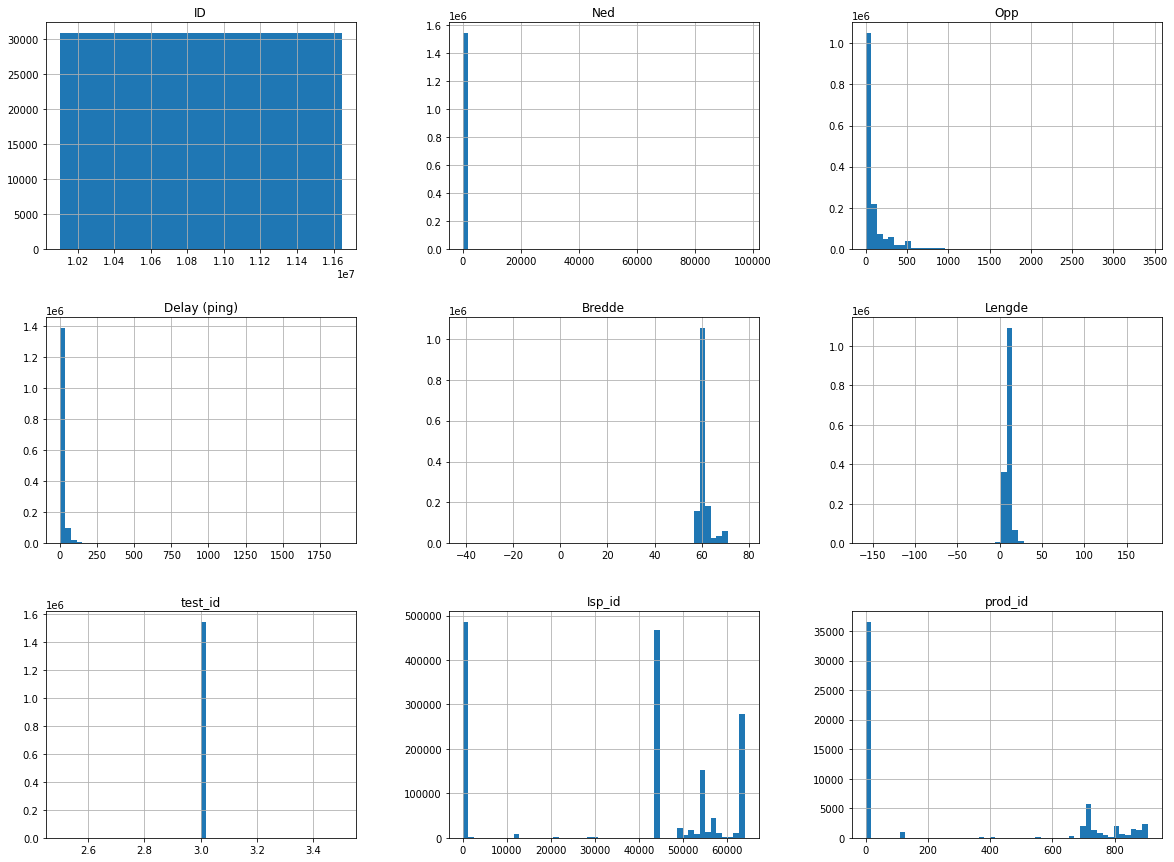

In [11]:
n13.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
n13["Ned"].sort_values(ascending=False).head(20)

658049     97121.872
658048     90823.230
467372      3418.267
20671       2842.292
384734      2223.139
84304       2012.798
323044      1896.410
20665       1763.761
285309       995.864
23927        984.551
1207448      980.306
1047064      965.252
500154       963.333
856358       961.268
353247       960.472
782140       960.186
669424       959.183
233047       958.025
1066001      956.734
974591       954.289
Name: Ned, dtype: float64

In [13]:
n13.iloc[658045:658052]

,ID,Ned,Opp,Delay (ping),Tid,ISP,By,Fylke,Land,Bredde,Lengde,test_id,Isp_id,prod_id,User platform,ip_ver
658045,10759312,60.708,52.603,21,2020-05-10 16:34:58,Altibox AS,Alsvag,Nordland,NO,68.9004,15.2610,3.0,191.0,NaN,Mozilla/5.0 (Windows NT 10.0; ) AppleWebKit/53...,ipv4
658046,10759313,11.049,10.949,49,2020-05-10 16:35:02,DigitalOcean,Amsterdam,North Holland,NL,52.3759,4.8975,3.0,51150.0,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,ipv4
658047,10759314,199.890,28.741,11,2020-05-10 16:35:08,Telenor Norge,Stavanger,Rogaland,NO,58.9598,5.7700,3.0,43728.0,NaN,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,ipv4
658048,10759315,90823.230,3414.047,15,2020-05-10 16:35:16,Altibox AS,Sortland,Nordland,NO,68.7011,15.3994,3.0,191.0,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,ipv4
658049,10759316,97121.872,3396.740,16,2020-05-10 16:35:59,Altibox AS,Sortland,Nordland,NO,68.7011,15.3994,3.0,191.0,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,ipv4
658050,10759317,83.529,0.771,8,2020-05-10 16:36:24,NTE Bredband,Hommelvik,Trøndelag,NO,63.4068,10.7848,3.0,54580.0,NaN,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,ipv4
658051,10759318,134.393,25.119,15,2020-05-10 16:36:40,Get AS,Oslo,Oslo County,NO,59.8468,10.7747,3.0,32.0,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,ipv4


In [14]:
n13= n13.drop([658048,658049], axis=0)


In [15]:
melted_up_down = n13[['Opp','Ned']].melt()
melted_up_down

,variable,value
0,Opp,8.559
1,Opp,8.126
2,Opp,1.225
3,Opp,159.884
4,Opp,510.641
...,...,...
3085593,Ned,37.186
3085594,Ned,3.454
3085595,Ned,351.947
3085596,Ned,37.521


<AxesSubplot:ylabel='Frequency'>

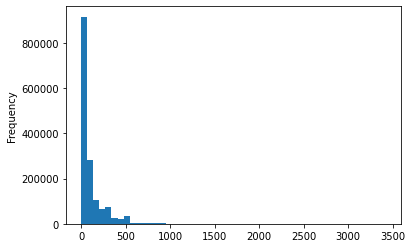

In [16]:
n13['Ned'].plot(kind='hist', bins= 50,)

<AxesSubplot:xlabel='value', ylabel='Count'>

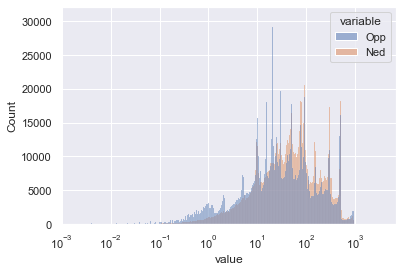

In [17]:
import seaborn as sns
sns.set_theme(style='darkgrid')

sns.histplot(melted_up_down, x='value', hue='variable' ,log_scale=True)



In [18]:
sns.histplot(melted_up_down, x=v, log_scale=True)


NameError: name 'v' is not defined

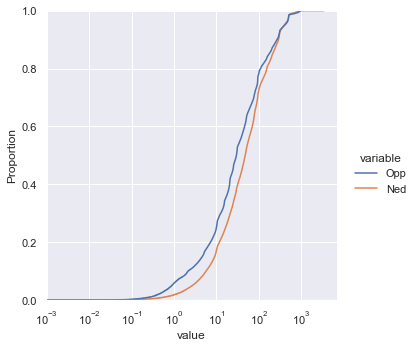

In [19]:


sns.displot(melted_up_down, x='value', hue='variable', log_scale=True, kind='ecdf')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Lengde', ylabel='Bredde'>

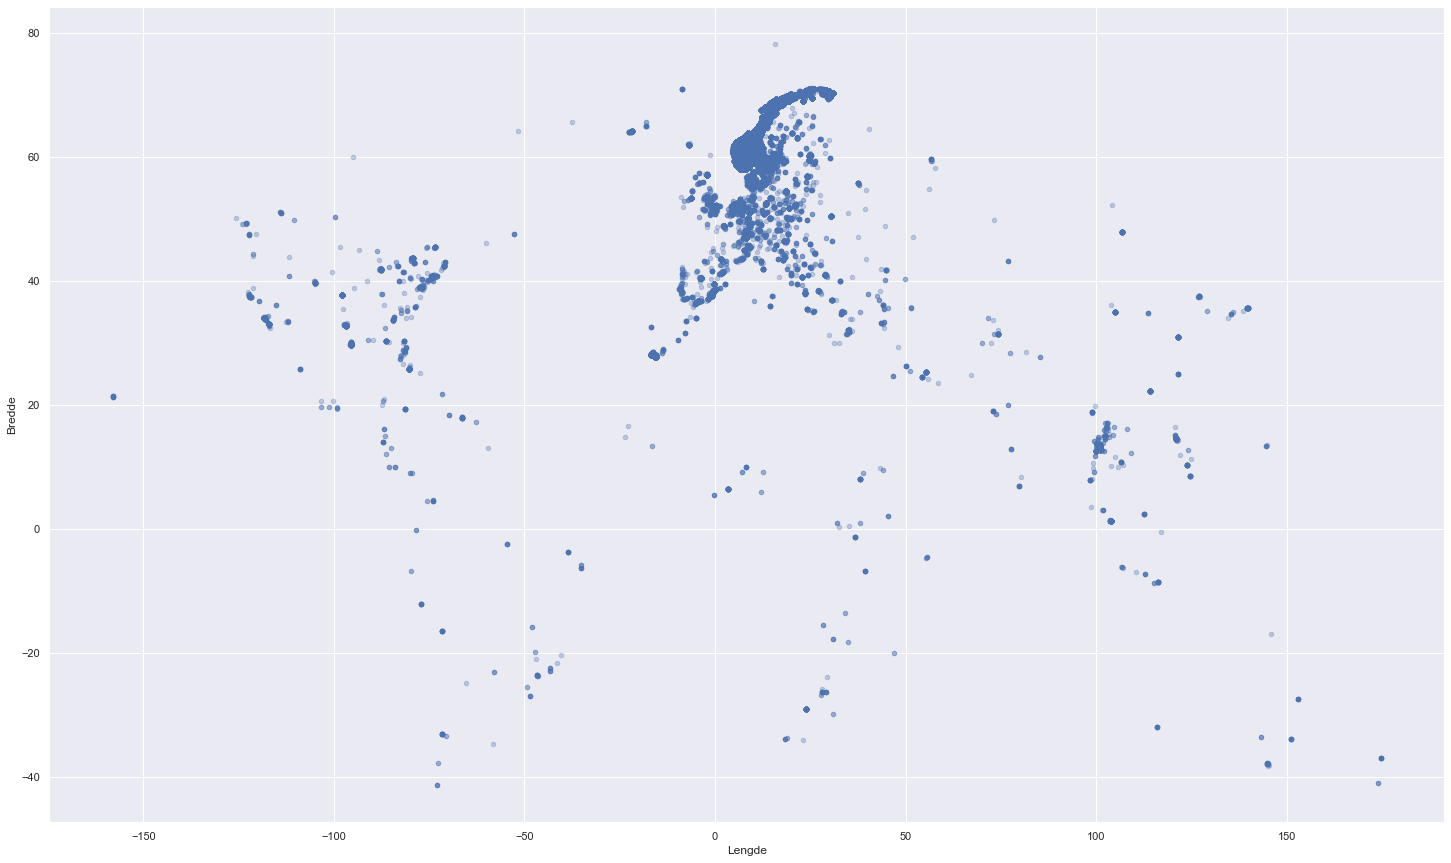

In [20]:
n13.plot(kind="scatter", x= "Lengde", y= "Bredde", alpha= 0.3, figsize= ( 25, 15))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Lengde', ylabel='Bredde'>

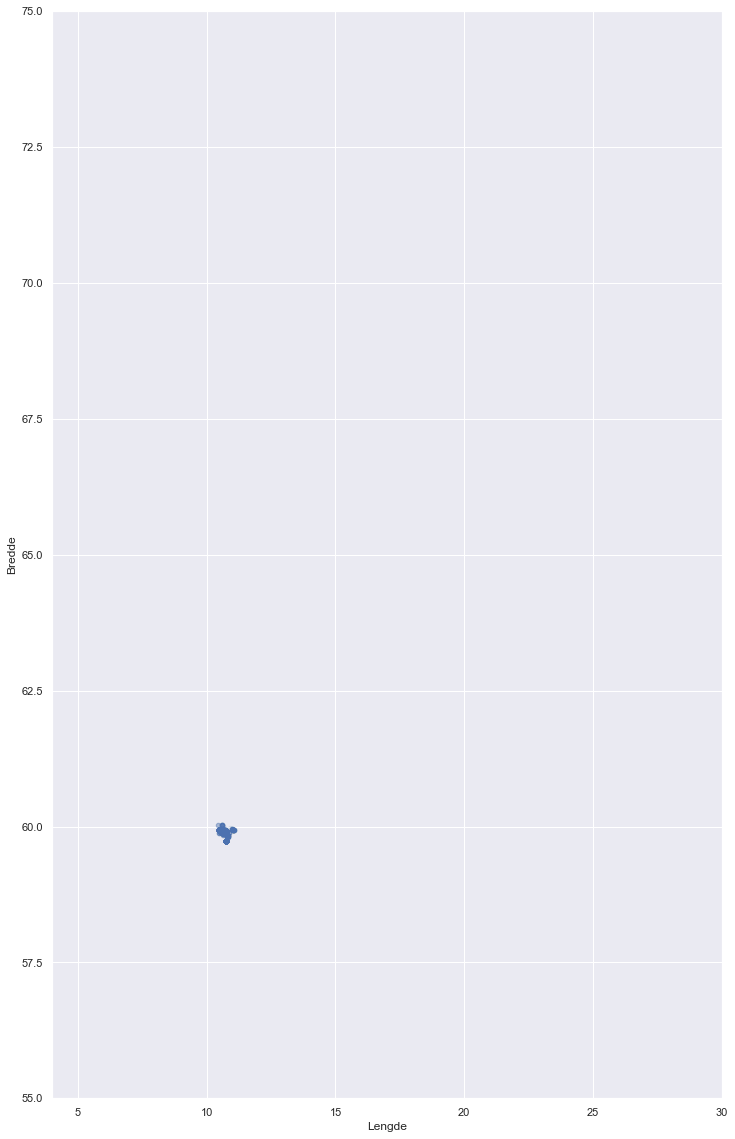

In [25]:
n13[n13['Fylke']=='Oslo County'].plot(kind="scatter", x= "Lengde", y= "Bredde", alpha= 0.1 , ylim= (55,75), xlim= (4, 30), figsize= (12, 20))


<AxesSubplot:xlabel='Lengde', ylabel='Bredde'>

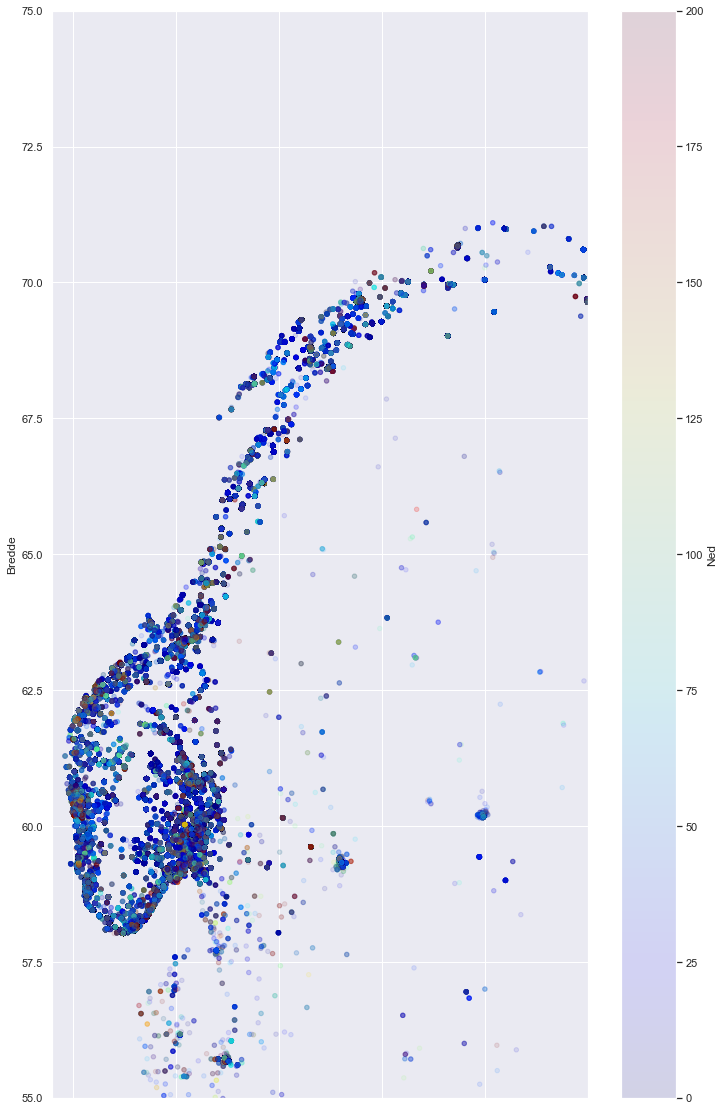

In [26]:
n13.plot(kind="scatter", x= "Lengde", y= "Bredde", alpha= 0.1 , ylim= (55,75), xlim= (4, 30), figsize= (12, 20),
        c="Ned", cmap=plt.get_cmap("jet"), colorbar= True, vmin = 0, vmax=200)

In [30]:
corr_matrix = n13.corr()

What corrolates the most with with down speed?

In [31]:
corr_matrix["Ned"].sort_values(ascending=False)

Ned             1.000000
Opp             0.776080
prod_id         0.195813
Bredde          0.035374
ID              0.025476
Lengde          0.003161
Isp_id         -0.136603
Delay (ping)   -0.142468
test_id              NaN
Name: Ned, dtype: float64

Vil endre tids kollonen til datetime objekter for å kunne gjøre tidsserie analyse.

In [28]:
n13["Tid"] = pd.to_datetime(n13["Tid"])

In [28]:
n13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542801 entries, 0 to 1542800
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   ID             1542801 non-null  int64         
 1   Ned            1542801 non-null  int64         
 2   Opp            1542801 non-null  int64         
 3   Delay (ping)   1542801 non-null  int64         
 4   Tid            1542801 non-null  datetime64[ns]
 5   ISP            1542801 non-null  object        
 6   By             1440410 non-null  object        
 7   Fylke          1445633 non-null  object        
 8   Land           1540378 non-null  object        
 9   Bredde         1542724 non-null  float64       
 10  Lengde         1542724 non-null  float64       
 11  test_id        1542801 non-null  float64       
 12  Isp_id         1542801 non-null  float64       
 13  prod_id        57396 non-null    float64       
 14  User platform  1542801 non-null  o

<function matplotlib.pyplot.show(close=None, block=None)>

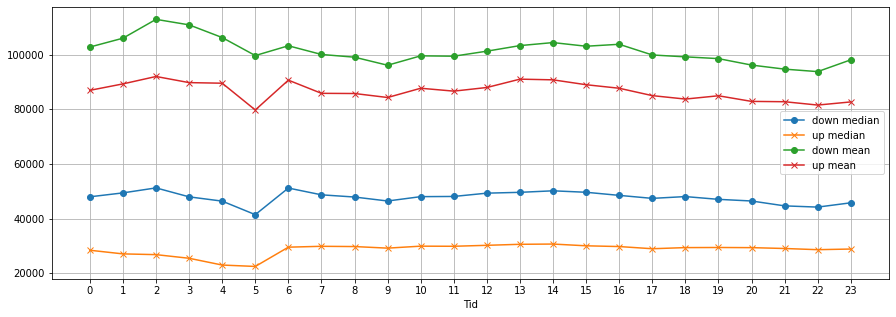

In [29]:
fig, axs = plt.subplots(figsize=(15, 5))
n13.groupby(n13["Tid"].dt.hour)["Ned"].median().plot(rot=0, ax=axs, style='-o')
n13.groupby(n13["Tid"].dt.hour)["Opp"].median().plot(rot=0, ax=axs, style='-x')
n13.groupby(n13["Tid"].dt.hour)["Ned"].mean().plot(rot=0, ax=axs, style='-o')
n13.groupby(n13["Tid"].dt.hour)["Opp"].mean().plot(rot=0, ax=axs, style='-x')
plt.grid()
plt.legend(["down median", "up median", "down mean", "up mean"])
plt.xticks(range(24))
plt.show

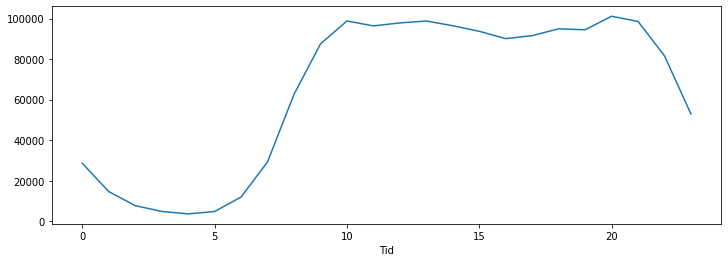

In [30]:
fig, axs = plt.subplots(figsize=(12, 4))
n13.groupby(n13["Tid"].dt.hour)["Ned"].count().plot(rot=0, ax=axs)
plt.show()

In [31]:
data_NO = n13[n13["Land"] == 'NO'] 
ispCounts = data_NO["ISP"].value_counts()
ispCounts

Telenor Norge        466783
Altibox AS           260539
Get AS               134139
Globalconnect        104368
Telia Norge           85798
                      ...  
One Voice                 1
Itera Norge AS            1
KEKLOLWTF AS              1
Samlerhuset Norge         1
Working Group Two         1
Name: ISP, Length: 437, dtype: int64

In [32]:
ispCounts["UNINETT"]

5360

In [33]:
uninett_data = data_NO[data_NO["ISP"] == 'UNINETT' ]

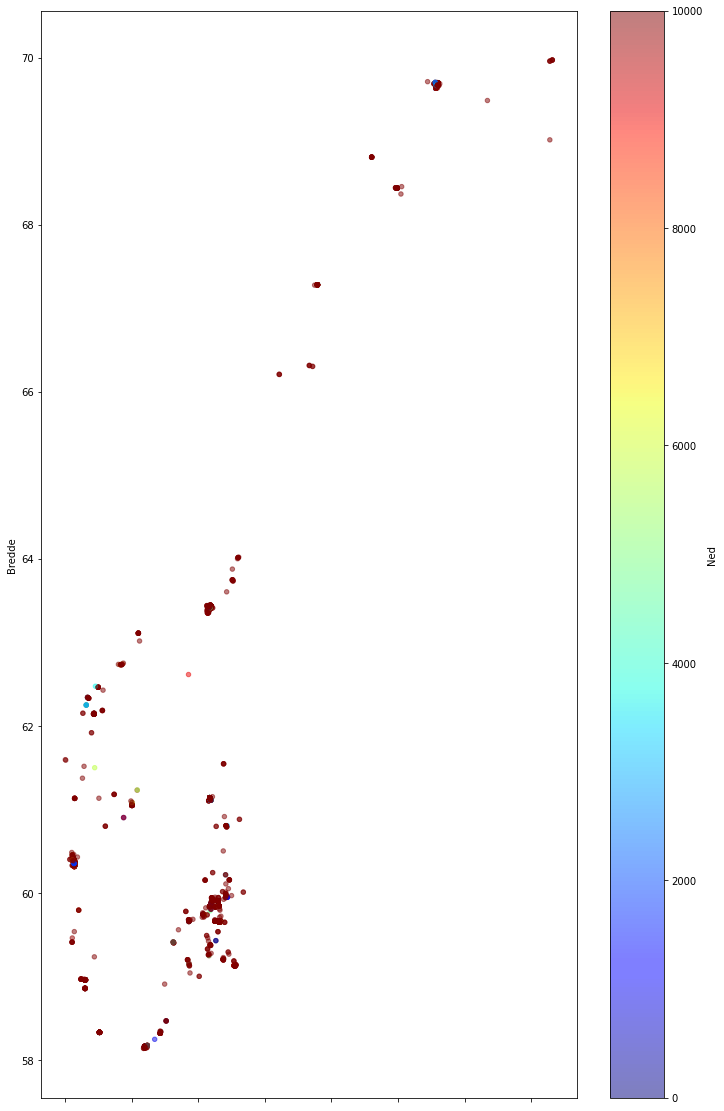

In [34]:
uninett_data.plot(kind="scatter", x= "Lengde", y= "Bredde", alpha= 0.5, figsize= (12, 20),
        c="Ned", cmap=plt.get_cmap("jet"), colorbar= True, vmin = 0, vmax=10000)
plt.show()

In [37]:
uninett_data["By"].value_counts()

Oslo          1820
Trondheim     1434
Bergen         326
Tromsø         322
As             278
              ... 
Jar              1
Brumunddal       1
Tolvsrod         1
Holter           1
Lillesand        1
Name: By, Length: 125, dtype: int64

In [38]:
trd_data = uninett_data[uninett_data["By"]=='Trondheim']

In [39]:
# puts time as index to ude resample
n13.index = n13["Tid"]

In [40]:
n13["Tid"].dt.date

Tid
2020-01-01 00:00:23    2020-01-01
2020-01-01 00:01:09    2020-01-01
2020-01-01 00:01:30    2020-01-01
2020-01-01 00:01:31    2020-01-01
2020-01-01 00:02:05    2020-01-01
                          ...    
2020-12-31 23:51:35    2020-12-31
2020-12-31 23:51:50    2020-12-31
2020-12-31 23:51:57    2020-12-31
2020-12-31 23:53:59    2020-12-31
2020-12-31 23:54:32    2020-12-31
Name: Tid, Length: 1542801, dtype: object

AttributeError: Can only use .dt accessor with datetimelike values

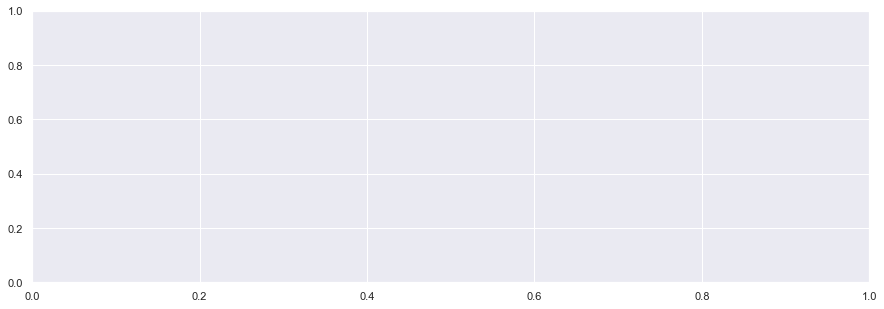

In [27]:
#median down speed for each date and for every two weeks
fig, axs = plt.subplots(figsize=(15, 5))
n13.groupby(n13["Tid"].dt.date)["Ned"].median().plot(ax =axs)
n13.resample("2W")["Ned"].median().plot(ax=axs)

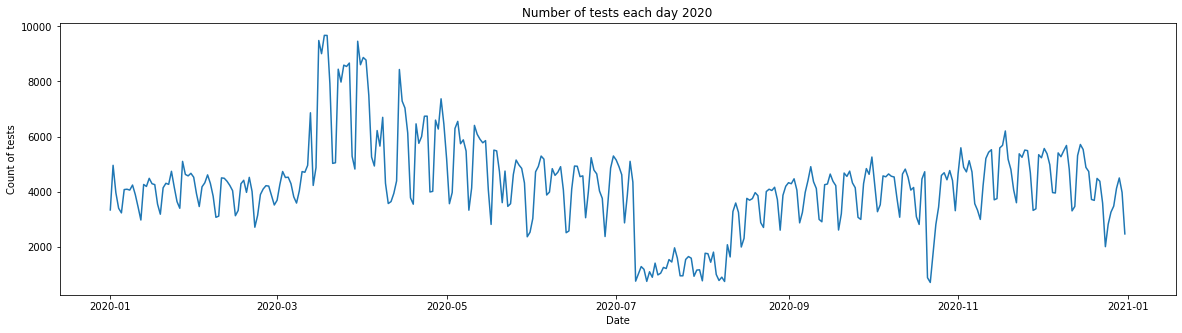

In [42]:

fig, axs = plt.subplots(figsize=(20, 5))
n13.groupby(n13["Tid"].dt.date)["Ned"].count().plot(ax =axs)
plt.title("Number of tests each day 2020")
plt.xlabel("Date")
plt.ylabel("Count of tests")
plt.savefig("numb_tests_2020")
plt.show()

<AxesSubplot:xlabel='Tid'>

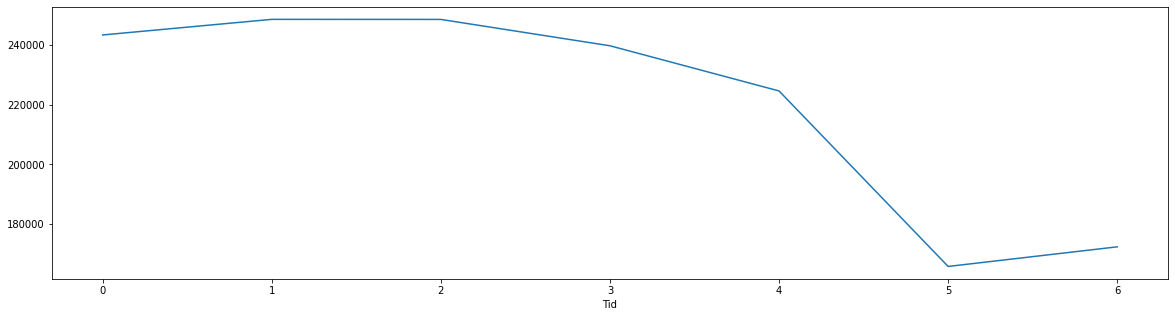

In [43]:
# 0 is monday 6 is sunday 
fig, axs = plt.subplots(figsize=(20, 5))
n13.groupby(n13["Tid"].dt.weekday)["Ned"].count().plot(ax =axs)

/Users/jesper/master/master_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Tid'>

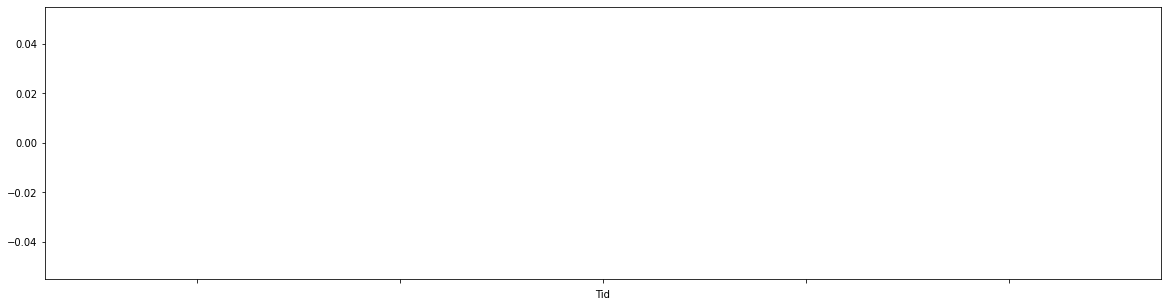

In [44]:
march13 = n13["2014-03-7":"2014-03-17"]
fig, axs = plt.subplots(figsize=(20, 5))
march13.groupby(march13["Tid"].dt.date)["Ned"].count().plot(ax =axs)
march13.groupby(march13["Tid"].dt.date)["Ned"].median().plot(ax =axs)

Looks at uninett data. Counts number of test in a day

size counts NaN values, count does not.

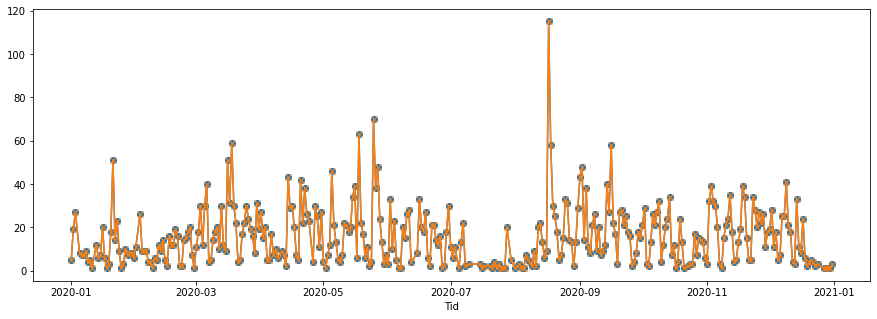

In [45]:
fig, axs = plt.subplots(figsize=(15, 5))
uninett_data.groupby(uninett_data["Tid"].dt.date)["Ned"].size().plot(ax=axs, rot =0, style="o-")
uninett_data.groupby(uninett_data["Tid"].dt.date)["Ned"].count().plot(ax=axs, rot =0, style="x-")


plt.show()

<AxesSubplot:xlabel='Tid'>

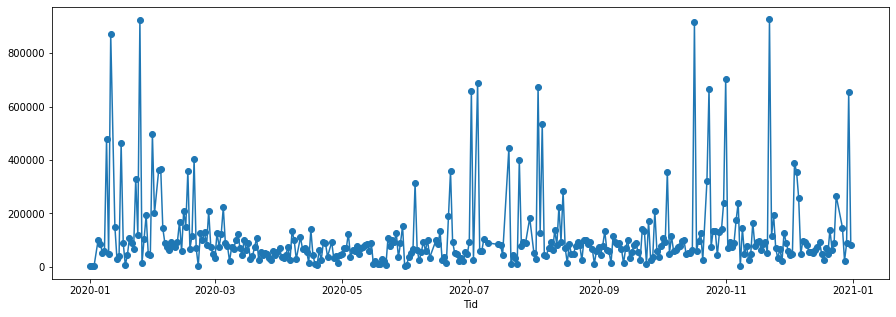

In [46]:
fig, axs = plt.subplots(figsize=(15, 5))
uninett_data.groupby(uninett_data["Tid"].dt.date)["Ned"].median().plot(ax=axs, rot =0, style="o-")

In [47]:
import seaborn as sns

In [48]:
n13.resample("2W")["Ned"].median()

Tid
2020-01-05    42940.0
2020-01-19    44768.5
2020-02-02    45861.5
2020-02-16    46691.0
2020-03-01    43657.0
2020-03-15    46778.0
2020-03-29    47419.0
2020-04-12    48256.5
2020-04-26    46451.0
2020-05-10    46642.0
2020-05-24    47397.5
2020-06-07    46515.0
2020-06-21    46774.0
2020-07-05    43652.5
2020-07-19    38669.0
2020-08-02    42236.0
2020-08-16    47308.0
2020-08-30    48572.0
2020-09-13    48838.0
2020-09-27    47354.0
2020-10-11    46861.5
2020-10-25    48656.5
2020-11-08    53931.0
2020-11-22    52743.0
2020-12-06    54487.0
2020-12-20    50894.0
2021-01-03    50290.0
Freq: 2W-SUN, Name: Ned, dtype: float64

In [49]:
n13

,ID,Ned,Opp,Delay (ping),Tid,ISP,By,Fylke,Land,Bredde,Lengde,test_id,Isp_id,prod_id,User platform,ip_ver
Tid,,,,,,,,,,,,,,,,
2020-01-01 00:00:23,10101267,45125,8559,19,2020-01-01 00:00:23,Stayon AS,Vestnes,Møre og Romsdal,NO,62.5869,6.9203,3.0,21466.0,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15) ...,ipv4
2020-01-01 00:01:09,10101268,40108,8126,20,2020-01-01 00:01:09,Stayon AS,Vestnes,Møre og Romsdal,NO,62.5869,6.9203,3.0,21466.0,NaN,Mozilla/5.0 (iPhone; CPU iPhone OS 13_3 like M...,ipv4
2020-01-01 00:01:30,10101269,1408,1225,24,2020-01-01 00:01:30,NextGenTel AS,Oslo,Oslo County,NO,59.9050,10.7487,3.0,1.0,NaN,Mozilla/5.0 (Linux; Android 9; VOG-L29) AppleW...,ipv4
2020-01-01 00:01:31,10101270,146704,159884,12,2020-01-01 00:01:31,Altibox AS,Sandnes,Rogaland,NO,58.8450,5.7386,3.0,191.0,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,ipv4
2020-01-01 00:02:05,10101271,506569,510641,4,2020-01-01 00:02:05,Altibox AS,Porsgrunn,Telemark,NO,59.1569,9.6628,3.0,191.0,707.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,ipv4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:51:35,11644063,37186,6422,21,2020-12-31 23:51:35,Telenor Norge,Oslo,Oslo County,NO,59.8457,10.7823,3.0,43728.0,NaN,Mozilla/5.0 (Linux; Android 10; SM-A202F) Appl...,ipv4
2020-12-31 23:51:50,11644064,3454,7180,3,2020-12-31 23:51:50,Globalconnect,Oslo,Oslo County,NO,59.8457,10.7823,3.0,62984.0,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,ipv4
2020-12-31 23:51:57,11644065,351947,211718,13,2020-12-31 23:51:57,NTE Bredband,Bjugn,Trøndelag,NO,63.7639,9.8231,3.0,54580.0,NaN,Mozilla/5.0 (Linux; Android 10; SAMSUNG SM-G97...,ipv4


In [39]:
n13[n13['ned']> 10000000]]

SyntaxError: invalid syntax (1780635796.py, line 1)

In [50]:
n13

,ID,Ned,Opp,Delay (ping),Tid,ISP,By,Fylke,Land,Bredde,Lengde,test_id,Isp_id,prod_id,User platform,ip_ver
Tid,,,,,,,,,,,,,,,,
2020-01-01 00:00:23,10101267,45125,8559,19,2020-01-01 00:00:23,Stayon AS,Vestnes,Møre og Romsdal,NO,62.5869,6.9203,3.0,21466.0,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15) ...,ipv4
2020-01-01 00:01:09,10101268,40108,8126,20,2020-01-01 00:01:09,Stayon AS,Vestnes,Møre og Romsdal,NO,62.5869,6.9203,3.0,21466.0,NaN,Mozilla/5.0 (iPhone; CPU iPhone OS 13_3 like M...,ipv4
2020-01-01 00:01:30,10101269,1408,1225,24,2020-01-01 00:01:30,NextGenTel AS,Oslo,Oslo County,NO,59.9050,10.7487,3.0,1.0,NaN,Mozilla/5.0 (Linux; Android 9; VOG-L29) AppleW...,ipv4
2020-01-01 00:01:31,10101270,146704,159884,12,2020-01-01 00:01:31,Altibox AS,Sandnes,Rogaland,NO,58.8450,5.7386,3.0,191.0,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,ipv4
2020-01-01 00:02:05,10101271,506569,510641,4,2020-01-01 00:02:05,Altibox AS,Porsgrunn,Telemark,NO,59.1569,9.6628,3.0,191.0,707.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,ipv4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:51:35,11644063,37186,6422,21,2020-12-31 23:51:35,Telenor Norge,Oslo,Oslo County,NO,59.8457,10.7823,3.0,43728.0,NaN,Mozilla/5.0 (Linux; Android 10; SM-A202F) Appl...,ipv4
2020-12-31 23:51:50,11644064,3454,7180,3,2020-12-31 23:51:50,Globalconnect,Oslo,Oslo County,NO,59.8457,10.7823,3.0,62984.0,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,ipv4
2020-12-31 23:51:57,11644065,351947,211718,13,2020-12-31 23:51:57,NTE Bredband,Bjugn,Trøndelag,NO,63.7639,9.8231,3.0,54580.0,NaN,Mozilla/5.0 (Linux; Android 10; SAMSUNG SM-G97...,ipv4


In [44]:
print(n13['Fylke'].dropna().unique().sort())

None


In [66]:
yap = n13[['Ned', 'Opp','Delay (ping)']].resample("D").quantile([0.1,0.9])
yap

Ned       Opp  Delay (ping)
Tid                                             
2020-01-01 0.1    3220.1    1905.1           5.0
           0.9  256705.9  287676.9          53.0
2020-01-02 0.1    4991.5    1777.4           5.0
           0.9  301794.5  292299.1          38.0
2020-01-03 0.1    5277.8    1913.4           4.0
...                  ...       ...           ...
2020-12-29 0.9  299309.8  284426.3          48.0
2020-12-30 0.1    5139.0    2529.0           5.0
           0.9  297011.8  293770.6          37.0
2020-12-31 0.1    5864.0    2681.0           5.0
           0.9  307428.0  307170.0          33.0

[732 rows x 3 columns]

In [70]:
yap.unstack().rename(columns={"Ned": "down_quant", "Opp": "up_quant"})  

down_quant           up_quant           Delay (ping)      
                  0.1       0.9      0.1       0.9          0.1   0.9
Tid                                                                  
2020-01-01     3220.1  256705.9   1905.1  287676.9          5.0  53.0
2020-01-02     4991.5  301794.5   1777.4  292299.1          5.0  38.0
2020-01-03     5277.8  289674.0   1913.4  286100.8          4.0  40.0
2020-01-04     5784.8  267033.5   1313.2  245511.5          4.0  38.0
2020-01-05     4465.8  285881.6   1064.4  234691.8          4.0  39.0
...               ...       ...      ...       ...          ...   ...
2020-12-27     5177.9  299373.6   2977.0  291217.0          5.0  37.0
2020-12-28     5297.0  305401.6   2786.2  305774.8          5.0  38.0
2020-12-29     3811.5  299309.8   2070.3  284426.3          5.0  48.0
2020-12-30     5139.0  297011.8   2529.0  293770.6          5.0  37.0
2020-12-31     5864.0  307428.0   2681.0  307170.0          5.0  33.0

[366 rows x 6 columns]